In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

In [82]:
def log_reg(df, label, num_features, cat_features):
    y = df[label]
    X = df.drop(label, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
    cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = 'ignore'))
    preprocessor = make_column_transformer((num_pipeline, num_features),
                                           (cat_pipeline, cat_features))
    model = make_pipeline(preprocessor, SGDClassifier())
    params = {
        'sgdclassifier__penalty':['l1', 'l2'],
        'sgdclassifier__loss':['hinge', 'log', 'modified_huber', 'squared_hinge']
    }
    grid = GridSearchCV(model, param_grid=params, cv=5)
    grid.fit(X_train, y_train)
    model_final = grid.best_estimator_
    test_score = model_final.score(X_test, y_test)
    print(f"Meilleurs paramètres : {grid.best_params_}")
    print(f"Meilleur Score d'entrainement : {grid.best_score_}")
    print("------------------------------")
    print(f"Score de test : {test_score}")
    
    N, train_score, val_score = learning_curve(model_final, X_train, y_train, cv=5)

    print(N)
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('train_sizes')
    plt.legend()
    
    return model_final

In [90]:
def k_nearest(df, label, num_features, cat_features):
    y = df[label]
    X = df.drop(label, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
    cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = 'ignore'))
    preprocessor = make_column_transformer((num_pipeline, num_features),
                                           (cat_pipeline, cat_features))
    model = make_pipeline(preprocessor, KNeighborsClassifier())
    param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1, 20),
                  'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']}

    grid = GridSearchCV(model, param_grid, cv=5)

    grid.fit(X_train, y_train)
    model_final = grid.best_estimator_
    test_score = model_final.score(X_test, y_test)
    print(f"Meilleurs paramètres : {grid.best_params_}")
    print(f"Meilleur Score d'entrainement : {grid.best_score_}")
    print("------------------------------")
    print(f"Score de test : {test_score}")
    
    N, train_score, val_score = learning_curve(model_final, X_train, y_train, cv=5)

    print(N)
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('train_sizes')
    plt.legend()
    
    return model_final

In [83]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Meilleurs paramètres : {'sgdclassifier__loss': 'hinge', 'sgdclassifier__penalty': 'l1'}
Meilleur Score d'entrainement : 0.7620469083155651
------------------------------
Score de test : 0.6816143497757847
[ 53 173 293 413 534]


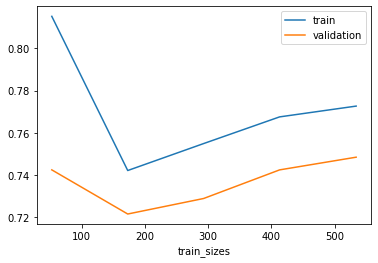

In [84]:
model = log_reg(titanic, 'survived', ['pclass', 'age', 'fare'], ['sex', 'deck', 'alone'])

In [ ]:
model2 = k_nearest(titanic, 'survived', ['pclass', 'age', 'fare'], ['sex', 'deck', 'alone'])